In [2]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv('Credit_card.csv')

In [4]:
df


,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,1,0,0,0,Managers,2,0
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1,0
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4,0
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,1,0,Drivers,2,0


## Data Description

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

In [16]:
df.isnull().sum()

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

In [17]:
m=df.isnull().sum()
m= m[m>0]
m

GENDER               7
Annual_income       23
Birthday_count      22
Type_Occupation    488
dtype: int64

## Data Cleaning 

In [18]:
Mode= df['GENDER'].mode()[0]
Mode

df['GENDER'].fillna(Mode, inplace=True)


In [19]:
m=df.isnull().sum()
m= m[m>0]
m

Annual_income       23
Birthday_count      22
Type_Occupation    488
dtype: int64

In [20]:
Median =df['Annual_income']. median()
Median

df['Annual_income'].fillna(Median, inplace=True)


In [21]:
M= df['Birthday_count'].mean()
Mean= round(M,1)
Mean

df['Birthday_count'].fillna(Mean, inplace=True)


In [63]:
# outlier detection 
import numpy as np

def detect_outliers_zscore(df, threshold=3):
    """
    Detect outliers in a dataset using the Z-score method.

    Parameters:
    - data: A NumPy array or list containing the data.
    - threshold: The Z-score threshold for detecting outliers. Default is 3.

    Returns:
    - An array of indices where outliers are located.
    """
    z_scores = (df - np.mean(df)) / np.std(df)
    outliers = np.where(np.abs(z_scores) > threshold)
    return outliers


print (outliers)


(array([], dtype=int64),)


## Exploratory Data Analysis (EDA)

In [22]:
import matplotlib.pyplot as plt 
import seaborn as sns 

C:\Users\FAO\AppData\Local\Temp\ipykernel_3272\2562231128.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor= df.corr()


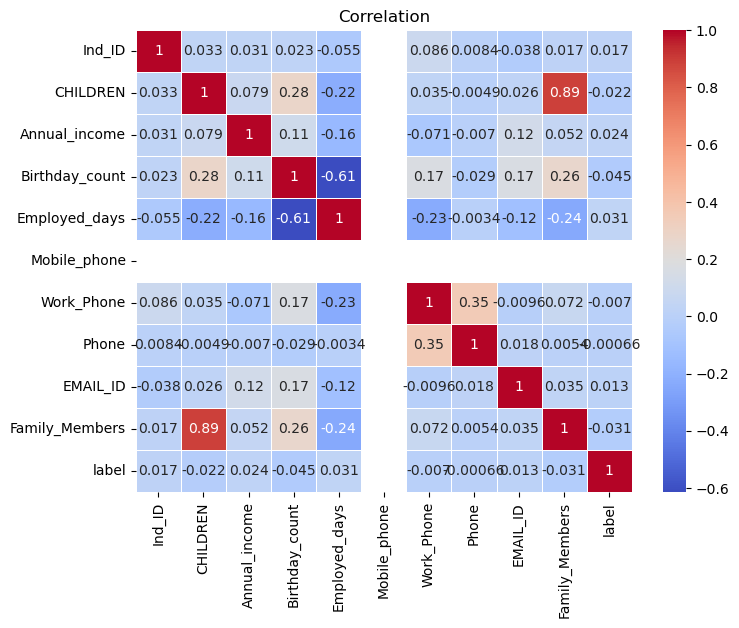

In [23]:
cor= df.corr()

plt.figure(figsize= (8,6))
sns.heatmap(cor, annot=True, cmap='coolwarm', lw=0.5)
plt.title('Correlation')
plt.show()

In [24]:
df=df.drop('Family_Members', axis=1)

In [25]:
df

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-16040.3,-586,1,1,1,0,NaN,1
3,5009749,F,Y,N,0,166500.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,0,166500.0,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,1,0,0,0,Managers,0
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,0
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,0
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,1,0,Drivers,0


In [26]:
df['Birthday_count']=abs(df['Birthday_count'])
df

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,18772.0,365243,1,0,0,0,NaN,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,13557.0,-586,1,1,1,0,NaN,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,16040.3,-586,1,1,1,0,NaN,1
3,5009749,F,Y,N,0,166500.0,Commercial associate,Higher education,Married,House / apartment,13557.0,-586,1,1,1,0,NaN,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,13557.0,-586,1,1,1,0,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,0,166500.0,Commercial associate,Higher education,Married,House / apartment,11957.0,-2182,1,0,0,0,Managers,0
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,10229.0,-1209,1,0,0,0,Accountants,0
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,13174.0,-2477,1,0,0,0,Managers,0
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,15292.0,-645,1,1,1,0,Drivers,0


In [27]:
df['Birthday_count']=((df['Birthday_count'])/365)

In [28]:
df['Birthday_count']=(df['Birthday_count'].astype(int))

In [29]:
df

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,51,365243,1,0,0,0,NaN,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37,-586,1,1,1,0,NaN,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,43,-586,1,1,1,0,NaN,1
3,5009749,F,Y,N,0,166500.0,Commercial associate,Higher education,Married,House / apartment,37,-586,1,1,1,0,NaN,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37,-586,1,1,1,0,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,0,166500.0,Commercial associate,Higher education,Married,House / apartment,32,-2182,1,0,0,0,Managers,0
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,28,-1209,1,0,0,0,Accountants,0
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,36,-2477,1,0,0,0,Managers,0
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,41,-645,1,1,1,0,Drivers,0


In [30]:
df['Employed_days']=((df['Employed_days'])/365)

In [31]:

df['Employed_days']=(df['Employed_days'].astype(int))

In [32]:
df

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,51,1000,1,0,0,0,NaN,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37,-1,1,1,1,0,NaN,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,43,-1,1,1,1,0,NaN,1
3,5009749,F,Y,N,0,166500.0,Commercial associate,Higher education,Married,House / apartment,37,-1,1,1,1,0,NaN,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37,-1,1,1,1,0,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,0,166500.0,Commercial associate,Higher education,Married,House / apartment,32,-5,1,0,0,0,Managers,0
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,28,-3,1,0,0,0,Accountants,0
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,36,-6,1,0,0,0,Managers,0
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,41,-1,1,1,1,0,Drivers,0


In [33]:
df=df.drop(0)

In [35]:
df

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,label
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37,-1,1,1,1,0,NaN,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,43,-1,1,1,1,0,NaN,1
3,5009749,F,Y,N,0,166500.0,Commercial associate,Higher education,Married,House / apartment,37,-1,1,1,1,0,NaN,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37,-1,1,1,1,0,NaN,1
5,5009753,F,Y,N,0,315000.0,Pensioner,Higher education,Married,House / apartment,37,-1,1,1,1,0,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,0,166500.0,Commercial associate,Higher education,Married,House / apartment,32,-5,1,0,0,0,Managers,0
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,28,-3,1,0,0,0,Accountants,0
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,36,-6,1,0,0,0,Managers,0
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,41,-1,1,1,1,0,Drivers,0


In [36]:
df['Type_Occupation'].unique()

array([nan, 'Core staff', 'Cooking staff', 'Laborers', 'Sales staff',
       'Accountants', 'High skill tech staff', 'Managers',
       'Cleaning staff', 'Drivers', 'Low-skill Laborers', 'IT staff',
       'Waiters/barmen staff', 'Security staff', 'Medicine staff',
       'Private service staff', 'HR staff', 'Secretaries',
       'Realty agents'], dtype=object)

In [37]:
df['Type_Occupation']=df['Type_Occupation'].fillna('Others')

In [38]:
df

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,label
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37,-1,1,1,1,0,Others,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,43,-1,1,1,1,0,Others,1
3,5009749,F,Y,N,0,166500.0,Commercial associate,Higher education,Married,House / apartment,37,-1,1,1,1,0,Others,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37,-1,1,1,1,0,Others,1
5,5009753,F,Y,N,0,315000.0,Pensioner,Higher education,Married,House / apartment,37,-1,1,1,1,0,Others,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,0,166500.0,Commercial associate,Higher education,Married,House / apartment,32,-5,1,0,0,0,Managers,0
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,28,-3,1,0,0,0,Accountants,0
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,36,-6,1,0,0,0,Managers,0
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,41,-1,1,1,1,0,Drivers,0


In [39]:
import seaborn as sns 
import matplotlib.pyplot as plt
from scipy.stats import norm, skew, boxcox 
from scipy import stats

In [40]:
numeric = df.select_dtypes(include=['number']).columns.difference(['label', 'Mobile_phone'])

In [41]:
numeric

Index(['Annual_income', 'Birthday_count', 'CHILDREN', 'EMAIL_ID',
       'Employed_days', 'Ind_ID', 'Phone', 'Work_Phone'],
      dtype='object')

C:\Users\FAO\AppData\Local\Temp\ipykernel_3272\1606876756.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[features], fit = norm)


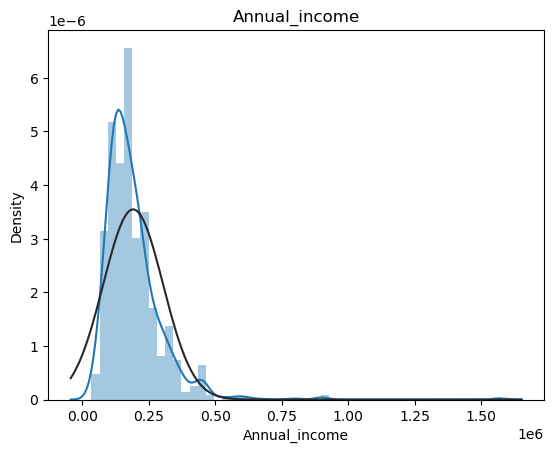

C:\Users\FAO\AppData\Local\Temp\ipykernel_3272\1606876756.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[features], fit = norm)


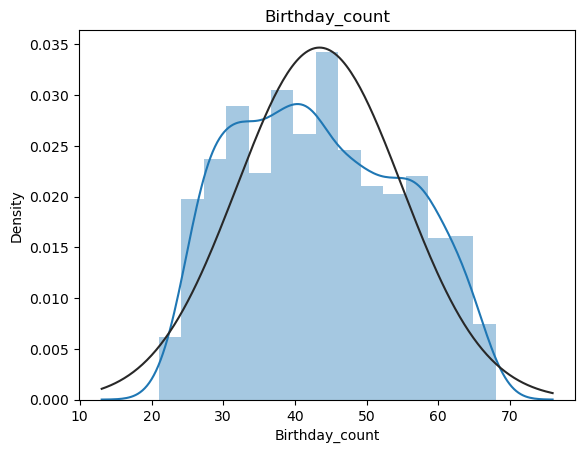

C:\Users\FAO\AppData\Local\Temp\ipykernel_3272\1606876756.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[features], fit = norm)


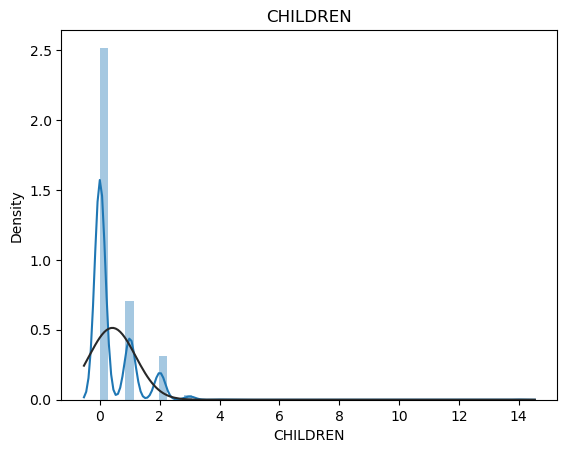

C:\Users\FAO\AppData\Local\Temp\ipykernel_3272\1606876756.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[features], fit = norm)


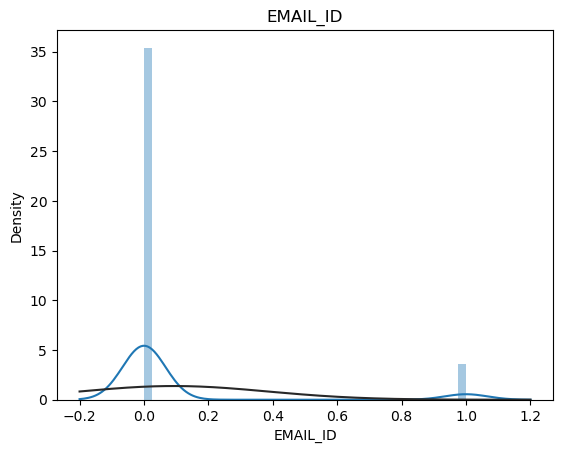

C:\Users\FAO\AppData\Local\Temp\ipykernel_3272\1606876756.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[features], fit = norm)


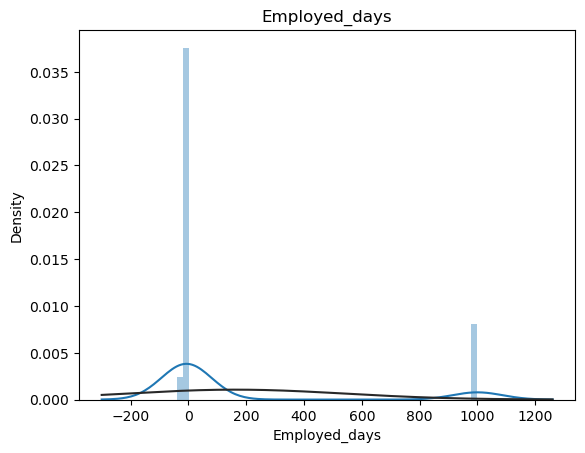

C:\Users\FAO\AppData\Local\Temp\ipykernel_3272\1606876756.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[features], fit = norm)


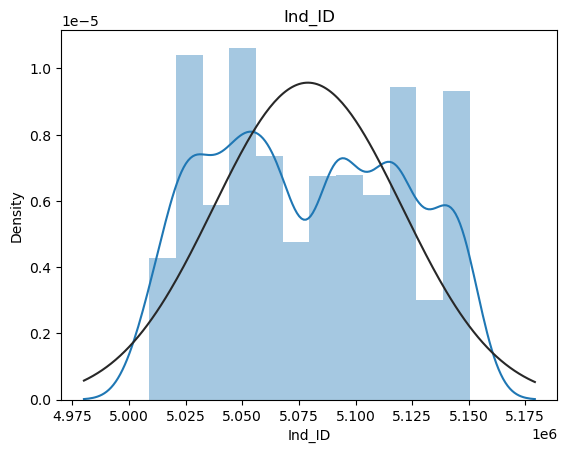

C:\Users\FAO\AppData\Local\Temp\ipykernel_3272\1606876756.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[features], fit = norm)


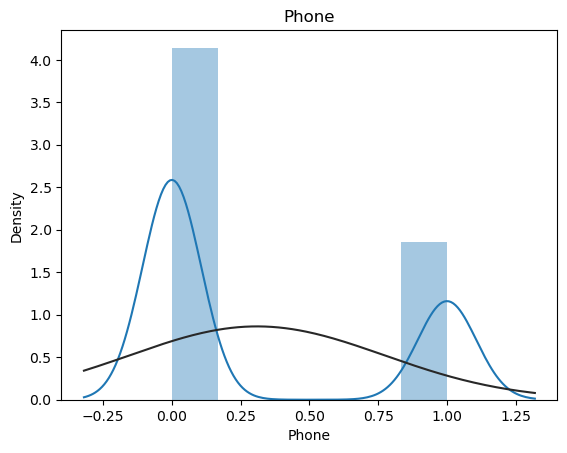

C:\Users\FAO\AppData\Local\Temp\ipykernel_3272\1606876756.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[features], fit = norm)


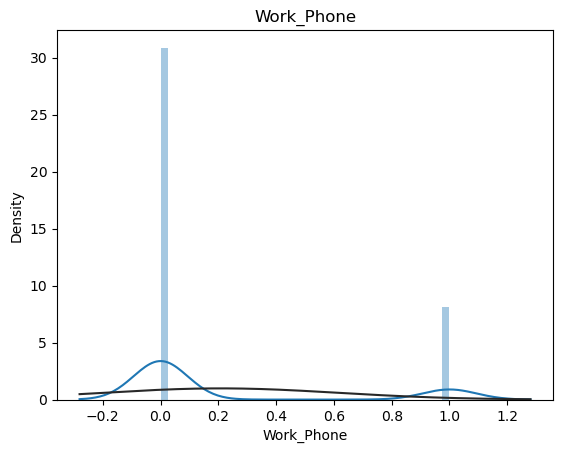

In [42]:
for features in numeric:
    sns.distplot(df[features], fit = norm)
    plt.title(features)
    plt.show()

## Skewness 

In [43]:
for features in numeric:
    skew= df[features].skew()
    skew = round(skew,2)
    print (features, skew)

Annual_income 3.96
Birthday_count 0.18
CHILDREN 4.63
EMAIL_ID 2.82
Employed_days 1.78
Ind_ID 0.07
Phone 0.82
Work_Phone 1.44


In [44]:
a= df['Annual_income'].skew()
c= df['CHILDREN'].skew()
e= df['EMAIL_ID'].skew()
emp= df['Employed_days'].skew()
w=  df['Work_Phone'].skew()

print(a,c,e,emp,w)


3.958023841118214 4.629963213301256 2.8169875775538107 1.7760907825548835 1.439173613991613


In [45]:
a1=np.log(a)
a2=np.log(c)
a3=np.log(e)
a4=np.log(emp)
a5=np.log(w)

print(a1,a2,a3,a4,a5)


1.3757448706888153 1.5325489227752733 1.0356680790704587 0.57441475956701 0.36406906968373887


In [46]:
#A=[1.3757448706888153, 1.5325489227752733, 1.5325489227752733, 0.57441475956701, 0.36406906968373887]
#A

In [47]:
#rounded= [round(num,1) for num in A ]
#rounded

In [48]:
#for features in numeric:
   # replace skew value of []

In [49]:
#data= {'a':[df['Annual_income'].skew()], 'c':[df['CHILDREN'].skew()], 'e':[df['EMAIL_ID'].skew()], 'emp':[df['Employed_days'].skew()], 'w':[df['Work_Phone'].skew()]}

In [50]:
#q=pd.DataFrame(data)
#q

## Model Building 

In [51]:
x= df.drop('label', axis = 1, )
y= df[['label']]

In [62]:
# now we convert all the categories of x into numerical variables 
d= pd.get_dummies(x)
d

,Ind_ID,CHILDREN,Annual_income,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,GENDER_F,...,Type_Occupation_Low-skill Laborers,Type_Occupation_Managers,Type_Occupation_Medicine staff,Type_Occupation_Others,Type_Occupation_Private service staff,Type_Occupation_Realty agents,Type_Occupation_Sales staff,Type_Occupation_Secretaries,Type_Occupation_Security staff,Type_Occupation_Waiters/barmen staff
1,5009744,0,315000.0,37,-1,1,1,1,0,1,...,0,0,0,1,0,0,0,0,0,0
2,5009746,0,315000.0,43,-1,1,1,1,0,1,...,0,0,0,1,0,0,0,0,0,0
3,5009749,0,166500.0,37,-1,1,1,1,0,1,...,0,0,0,1,0,0,0,0,0,0
4,5009752,0,315000.0,37,-1,1,1,1,0,1,...,0,0,0,1,0,0,0,0,0,0
5,5009753,0,315000.0,37,-1,1,1,1,0,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,0,166500.0,32,-5,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
1544,5023655,0,225000.0,28,-3,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1545,5115992,2,180000.0,36,-6,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1546,5118219,0,270000.0,41,-1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()

scaled_features = [features for features in d.columns]
scaled_data = scaler.fit_transform(d)

A=pd.DataFrame(data= scaled_data, columns= scaled_features)
A

,Ind_ID,CHILDREN,Annual_income,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,GENDER_F,...,Type_Occupation_Low-skill Laborers,Type_Occupation_Managers,Type_Occupation_Medicine staff,Type_Occupation_Others,Type_Occupation_Private service staff,Type_Occupation_Realty agents,Type_Occupation_Sales staff,Type_Occupation_Secretaries,Type_Occupation_Security staff,Type_Occupation_Waiters/barmen staff
0,0.006210,0.000000,0.182482,0.340426,0.037500,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.006224,0.000000,0.182482,0.468085,0.037500,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.006245,0.000000,0.086131,0.340426,0.037500,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.006266,0.000000,0.182482,0.340426,0.037500,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.006274,0.000000,0.182482,0.340426,0.037500,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1542,0.139742,0.000000,0.086131,0.234043,0.033654,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1543,0.104488,0.000000,0.124088,0.148936,0.035577,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1544,0.756830,0.142857,0.094891,0.319149,0.032692,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1545,0.772563,0.000000,0.153285,0.425532,0.037500,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
# we divide our dataset into our Train and Test sets (80% and 20% respectively)
from sklearn.model_selection import train_test_split
d_train, d_test, y_train, y_test = train_test_split (d,y, test_size =0.2, random_state= 42)

In [55]:
#from sklearn.svm import SVC
#model = SVC()

#model.fit(d_train, y_train)
#model.score(d_test, y_test)

In [56]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [57]:
model= SVC()
model.fit(d_train, y_train)

C:\Users\FAO\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [58]:
pred= model.predict(d_test)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [59]:
accuracy = accuracy_score(y_test, pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9032258064516129


In [60]:
df

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,label
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37,-1,1,1,1,0,Others,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,43,-1,1,1,1,0,Others,1
3,5009749,F,Y,N,0,166500.0,Commercial associate,Higher education,Married,House / apartment,37,-1,1,1,1,0,Others,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37,-1,1,1,1,0,Others,1
5,5009753,F,Y,N,0,315000.0,Pensioner,Higher education,Married,House / apartment,37,-1,1,1,1,0,Others,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,0,166500.0,Commercial associate,Higher education,Married,House / apartment,32,-5,1,0,0,0,Managers,0
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,28,-3,1,0,0,0,Accountants,0
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,36,-6,1,0,0,0,Managers,0
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,41,-1,1,1,1,0,Drivers,0


In [61]:
# outlier detection 
import numpy as np

def detect_outliers_zscore(df, threshold=3):
    """
    Detect outliers in a dataset using the Z-score method.

    Parameters:
    - data: A NumPy array or list containing the data.
    - threshold: The Z-score threshold for detecting outliers. Default is 3.

    Returns:
    - An array of indices where outliers are located.
    """
    z_scores = (df - np.mean(df)) / np.std(df)
    outliers = np.where(np.abs(z_scores) > threshold)
    return outliers


print (outliers)




(array([], dtype=int64),)
